<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#006bb3;overflow:hidden"><b>Problem Definitions and Evaluation Criteria for the CEC 2017</b></div>

<a id="lib"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#006bb3;overflow:hidden"><b>Importing Required Libraries</b></div>

In [2]:
!git clone https://github.com/tilleyd/cec2017-py.git

fatal: destination path 'cec2017-py' already exists and is not an empty directory.


In [3]:
import sys
sys.path.insert(1, '/content/cec2017-py')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import cec2017.functions as functions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id="plot"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#006bb3;overflow:hidden"><b>Defining the Plot Function for CEC Benchmark</b></div>

In [ ]:
def surface_plot_1(function, domain=(-100,100), points=30, dimension=2, ax=None):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))
    surf = ax.plot_surface(X, Y, Z, cmap='plasma') #, edgecolor='none')
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15, label='')
    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Set the axis color to match the background color
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()

    return fig

In [ ]:
def contour_plot_1(function, domain=(-100,100), points=30, ax=None, dimension=2):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)

    fig = plt.figure()
    ax = fig.gca()

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))
    cont = ax.contourf(X, Y, Z, lw = 1, levels=20, cmap='plasma')
    ax.contour(X, Y, Z, colors="k", linestyles="solid")
    cbar = fig.colorbar(cont, shrink=0.5, aspect=5, pad=0.15, label='')
#     cbar = fig.colorbar(ax.collections[0], shrink=0.5, aspect=5, pad=0.15, label='')

    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()

    return fig

In [ ]:
def surface_plot_2(function, domain=(-100,100), points=30, dimension=2, ax=None):
    # create points^2 tuples of (x,y) and populate z
    xys = np.linspace(domain[0], domain[1], points)
    xys = np.transpose([np.tile(xys, len(xys)), np.repeat(xys, len(xys))])

    if dimension > 2:
        # concatenate remaining zeros
        tail = np.zeros((xys.shape[0], dimension - 2))
        x = np.concatenate([xys, tail], axis=1)
        zs = function(x)
    else:
        zs = function(xys)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = xys[:,0].reshape((points, points))
    Y = xys[:,1].reshape((points, points))
    Z = zs.reshape((points, points))

    # plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='plasma') #, edgecolor='none')
    ax.contour(X, Y, Z, zdir='z', cmap="plasma", linestyles="solid", offset=40)
    ax.contour(X, Y, Z, zdir='z', colors="k", linestyles="solid")
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15, label='')
    ax.set_title(function.__name__)

    # plot contour
    ax.contour(X, Y, Z, levels=10, cmap='plasma')

    ax.set_title(function.__name__)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('y')

    # Set the background color
    ax.set_facecolor((1.0, 1.0, 1.0, 0.0))
    plt.show()

    return fig


<a id="plot3d"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#006bb3;overflow:hidden"><b>Plot the Functions</b></div>

In [ ]:
Dim = 100
NP = 10
bound = 100

In [ ]:
for f in functions.all_functions:
    surface_plot_2(f, points=120, dimension=Dim)

In [ ]:
for f in functions.all_functions:
    contour_plot_1(f, points=120, dimension=Dim)

In [5]:
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor

def load_data(file_path):
    # Read the CSV file, skipping the first row and using the second row as header
    df = pd.read_csv(file_path, skiprows=1, header=0)

    # Print the column names to verify
    print("Column names:")
    print(df.columns)

    # Print the first few rows to verify
    print("\nFirst few rows:")
    print(df.head())

    # Identify the columns
    id_vars = ['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date']
    time_columns = [col for col in df.columns if ':' in col]

    # Melt the dataframe to long format
    df_melted = df.melt(id_vars=id_vars,
                        value_vars=time_columns,
                        var_name='Time',
                        value_name='Energy')

    # Convert date to datetime
    df_melted['date'] = pd.to_datetime(df_melted['date'], format='%d/%m/%Y', errors='coerce')

    # Combine date and time
    df_melted['datetime'] = pd.to_datetime(df_melted['date'].astype(str) + ' ' + df_melted['Time'])

    # Convert Energy to numeric, replacing any non-numeric values with NaN
    df_melted['Energy'] = pd.to_numeric(df_melted['Energy'], errors='coerce')

    # Select only the first 10 unique customers
    unique_customers = df_melted['Customer'].unique()[:10]
    df_filtered = df_melted[df_melted['Customer'].isin(unique_customers)]

    # Pivot the filtered dataframe
    df_pivot = df_filtered.pivot_table(values='Energy',
                                       index=['Customer', 'Generator Capacity', 'Postcode', 'datetime'],
                                       columns='Consumption Category')

    # Reset the index
    df_pivot.reset_index(inplace=True)

    return df_pivot

def preprocess_data(data):
    # Assume gross generation is in 'Gross Generation' column
    gross_generation = data['GG']
    energy_consumption = data['GC']

    return gross_generation, energy_consumption

def solar_pv_model(num_panels, battery_capacity, solar_generation, energy_consumption):
    energy_balance = solar_generation - energy_consumption

    battery_soc = np.zeros(len(energy_balance))
    grid_import = np.zeros(len(energy_balance))
    grid_export = np.zeros(len(energy_balance))

    for i in range(1, len(energy_balance)):
        if energy_balance[i] > 0:
            battery_charge = min(energy_balance[i], battery_capacity - battery_soc[i-1])
            battery_soc[i] = battery_soc[i-1] + battery_charge
            grid_export[i] = energy_balance[i] - battery_charge
        else:
            battery_discharge = min(-energy_balance[i], battery_soc[i-1])
            battery_soc[i] = battery_soc[i-1] - battery_discharge
            grid_import[i] = -energy_balance[i] - battery_discharge

    return solar_generation.sum(), grid_import.sum(), grid_export.sum()

def objective_function(params, solar_generation, energy_consumption):
    num_panels, battery_capacity = params
    generation, imports, exports = solar_pv_model(num_panels, battery_capacity, solar_generation, energy_consumption)

    panel_cost = 200 * num_panels
    battery_cost = 500 * battery_capacity
    electricity_cost = 0.15 * imports
    feed_in_tariff = 0.10 * exports

    total_cost = panel_cost + battery_cost + electricity_cost - feed_in_tariff
    return total_cost

def evaluate_particle(particle, solar_generation, energy_consumption):
    return objective_function(particle, solar_generation, energy_consumption)

def pso(func, dim, bounds, num_particles, max_iter, w, c1, c2, solar_generation, energy_consumption):
    particles = np.random.uniform(bounds[:, 0], bounds[:, 1], (num_particles, dim))
    velocities = np.random.uniform(-1, 1, (num_particles, dim))

    personal_best = particles.copy()
    personal_best_fitness = np.array([func(p, solar_generation, energy_consumption) for p in personal_best])
    global_best_index = np.argmin(personal_best_fitness)
    global_best = personal_best[global_best_index]
    global_best_fitness = personal_best_fitness[global_best_index]

    for _ in range(max_iter):
        r1, r2 = np.random.rand(2)
        velocities = (w * velocities
                      + c1 * r1 * (personal_best - particles)
                      + c2 * r2 * (global_best - particles))

        particles += velocities
        particles = np.clip(particles, bounds[:, 0], bounds[:, 1])

        with ThreadPoolExecutor() as executor:
            fitness = np.array(list(executor.map(lambda p: func(p, solar_generation, energy_consumption), particles)))

        improved = fitness < personal_best_fitness
        personal_best[improved] = particles[improved]
        personal_best_fitness[improved] = fitness[improved]

        if np.min(fitness) < global_best_fitness:
            global_best_index = np.argmin(fitness)
            global_best = particles[global_best_index]
            global_best_fitness = fitness[global_best_index]

    return global_best, global_best_fitness

if __name__ == "__main__":
    data = load_data('/content/solar.csv')  # Replace with your actual file path

    solar_generation, energy_consumption = preprocess_data(data)

    dim = 2
    bounds = np.array([[1, 100], [0, 50]])

    num_particles = 50
    max_iter = 100
    w, c1, c2 = 0.5, 1.5, 1.5

    print("Running PSO...")
    best_solution, best_fitness = pso(objective_function, dim, bounds, num_particles, max_iter, w, c1, c2, solar_generation, energy_consumption)

    num_panels, battery_capacity = best_solution
    print(f"Optimal number of panels: {int(num_panels)}")
    print(f"Optimal battery capacity: {battery_capacity:.2f} kWh")
    print(f"Minimum total cost: ${best_fitness:.2f}")

    generation, imports, exports = solar_pv_model(num_panels, battery_capacity, solar_generation, energy_consumption)
    print(f"Annual energy generation: {generation:.2f} kWh")
    print(f"Annual grid imports: {imports:.2f} kWh")
    print(f"Annual grid exports: {exports:.2f} kWh")


Column names:
Index(['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category',
       'date', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00',
       '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
       '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
       '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
       '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
       '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00',
       'Row Quality'],
      dtype='object')

First few rows:
   Customer  Generator Capacity  Postcode Consumption Category       date  \
0         1                3.78      2076                   CL  1/07/2012   
1         1                3.78      2076                   GC  1/07/2012   
2         1                3.78      2076                   GG  1/07/2012   
3         1                3.78      2076                   CL  2/07/2012   


Function 1:
  Dimension 10: Best fitness = 20129770941.79458
  Dimension 30: Best fitness = 146717222435.01962
  Dimension 50: Best fitness = 591436656694.131
  Dimension 100: Best fitness = 1731136677885.0369

Function 2:
  Dimension 10: Best fitness = 4546497.855367094
  Dimension 30: Best fitness = 2.493229868638038e+34
  Dimension 50: Best fitness = 1.3464247841277402e+70
  Dimension 100: Best fitness = 7.869538055969939e+148

Function 3:
  Dimension 10: Best fitness = 8810.56308326856
  Dimension 30: Best fitness = 97570.3934613918
  Dimension 50: Best fitness = 527129.6461167489
  Dimension 100: Best fitness = 512214.01327205217

Function 4:
  Dimension 10: Best fitness = 408.3132123110468
  Dimension 30: Best fitness = 3072.1233097807226
  Dimension 50: Best fitness = 10405.154260826574
  Dimension 100: Best fitness = 39482.83671918088

Function 5:
  Dimension 10: Best fitness = 546.9626271342222
  Dimension 30: Best fitness = 781.4452046528361
  Dimension 50: Best fitness = 951

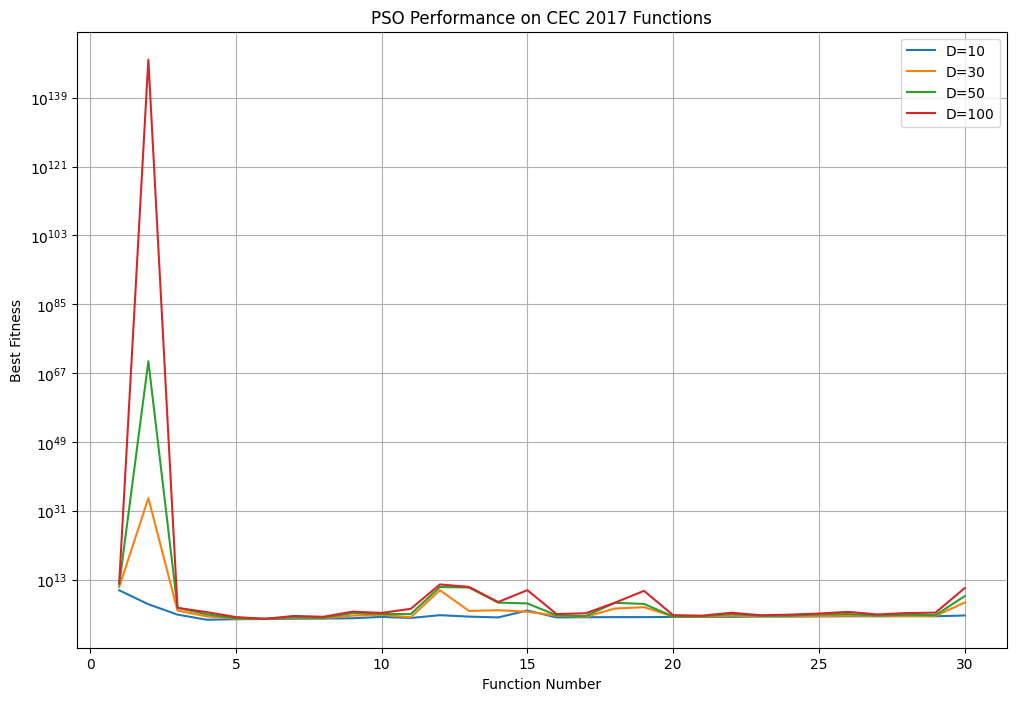

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cec2017.functions as functions
import warnings

warnings.filterwarnings('ignore')

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

def PSO(ObjF, Pop_Size, D, MaxT):
    swarm_best_position = None
    swarm_best_fitness = float('inf')
    particles = []

    # Position Initialization
    for _ in range(Pop_Size):
        position = np.random.uniform(-100, 100, D)
        particle = Particle(position)
        particles.append(particle)

        # Fitness Update
        fitness = ObjF(position.reshape(1, -1))  # Reshape to 2D array
        if fitness < swarm_best_fitness:
            swarm_best_fitness = fitness
            swarm_best_position = position
        particle.best_position = position
        particle.best_fitness = fitness

    # PSO Main Loop
    for _ in range(MaxT):
        for particle in particles:
            # Update Velocity
            w = 0.729  # Constriction coefficient
            c1 = c2 = 1.49445  # Acceleration coefficients
            r1, r2 = np.random.rand(2)

            # Velocity Calculation
            particle.velocity = (w * particle.velocity +
                                 c1 * r1 * (particle.best_position - particle.position) +
                                 c2 * r2 * (swarm_best_position - particle.position))

            # New Position
            particle.position += particle.velocity

            # Bound the position
            np.clip(particle.position, -100, 100, out=particle.position)

            # Evaluate Fitness
            fitness = ObjF(particle.position.reshape(1, -1))  # Reshape to 2D array

            # Update PBest
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update GBest
            if fitness < swarm_best_fitness:
                swarm_best_fitness = fitness
                swarm_best_position = particle.position.copy()

    return swarm_best_position, swarm_best_fitness

# Run PSO for all CEC 2017 functions and different dimensions
dimensions = [10, 30, 50, 100]
max_iterations = 1000
population_size = 50

results = {}

for func_num in range(1, 31):  # CEC 2017 has 30 functions
    func = getattr(functions, f'f{func_num}')
    results[func_num] = {}

    for dim in dimensions:
        # Create a wrapper function to handle the reshaping
        def wrapped_func(x):
            return func(x.reshape(1, -1))[0]

        best_position, best_fitness = PSO(wrapped_func, population_size, dim, max_iterations)
        results[func_num][dim] = best_fitness

# Print results
for func_num, func_results in results.items():
    print(f"Function {func_num}:")
    for dim, fitness in func_results.items():
        print(f"  Dimension {dim}: Best fitness = {fitness}")
    print()

# Plotting
plt.figure(figsize=(12, 8))
for dim in dimensions:
    fitnesses = [results[func_num][dim] for func_num in range(1, 31)]
    plt.plot(range(1, 31), fitnesses, label=f'D={dim}')

plt.xlabel('Function Number')
plt.ylabel('Best Fitness')
plt.title('PSO Performance on CEC 2017 Functions')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import cec2017.functions as cec_functions

class ImprovedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound,
                 w_min=0.4, w_max=0.9, c1=2.0, c2=2.0, pca_components=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.pca_components = pca_components
        self.particles = np.random.uniform(min_bound, max_bound, (num_particles, dim))
        self.velocities = np.random.uniform(-1, 1, (num_particles, dim))
        self.personal_best_pos = self.particles.copy()
        self.personal_best_score = np.array([self.objective_func(p.reshape(1, -1))[0] for p in self.particles])
        self.global_best_pos = self.personal_best_pos[self.personal_best_score.argmin()]
        self.global_best_score = self.personal_best_score.min()
        if self.pca_components:
            self.pca = PCA(n_components=pca_components)
            self.particles = self.pca.fit_transform(self.particles)
            self.velocities = self.pca.transform(self.velocities)
            self.personal_best_pos = self.pca.transform(self.personal_best_pos)
            self.global_best_pos = self.pca.transform(self.global_best_pos.reshape(1, -1)).flatten()

    def adaptive_inertia_weight(self, current_iter):
        return self.w_max - (self.w_max - self.w_min) * current_iter / self.max_iter

    def optimize(self):
        for iteration in range(self.max_iter):
            w = self.adaptive_inertia_weight(iteration)
            for i in range(self.num_particles):
                if self.pca_components:
                    particle = self.pca.inverse_transform(self.particles[i].reshape(1, -1)).flatten()
                else:
                    particle = self.particles[i]
                score = self.objective_func(particle.reshape(1, -1))[0]
                if score < self.personal_best_score[i]:
                    self.personal_best_score[i] = score
                    self.personal_best_pos[i] = self.particles[i]
                    if score < self.global_best_score:
                        self.global_best_score = score
                        self.global_best_pos = self.particles[i]
            r1, r2 = np.random.rand(2)
            self.velocities = (w * self.velocities +
                               self.c1 * r1 * (self.personal_best_pos - self.particles) +
                               self.c2 * r2 * (self.global_best_pos - self.particles))
            self.particles += self.velocities
            self.particles = np.clip(self.particles, self.min_bound, self.max_bound)
        if self.pca_components:
            self.global_best_pos = self.pca.inverse_transform(self.global_best_pos.reshape(1, -1)).flatten()
        return self.global_best_pos, self.global_best_score

# Test for CEC 2017 functions
dimensions = [10, 30, 50, 100]
num_particles = 50
max_iter = 1000
min_bound = -100
max_bound = 100

results = {}

for func_num in range(1, 31):  # CEC 2017 has 30 functions
    func = getattr(cec_functions, f'f{func_num}')
    results[func_num] = {}

    for dim in dimensions:
        print(f"Testing function {func_num} with dimension {dim}")

        # Without PCA
        pso = ImprovedPSO(func, dim, num_particles, max_iter, min_bound, max_bound)
        best_position, best_score = pso.optimize()
        results[func_num][f"dim_{dim}_no_pca"] = best_score

        # With PCA
        pca_components = min(dim // 2, 50)  # Use half the dimensions or 50, whichever is smaller
        pso_with_pca = ImprovedPSO(func, dim, num_particles, max_iter, min_bound, max_bound, pca_components=pca_components)
        best_position_pca, best_score_pca = pso_with_pca.optimize()
        results[func_num][f"dim_{dim}_with_pca"] = best_score_pca

# Print results
for func_num, func_results in results.items():
    print(f"\nFunction {func_num}:")
    for key, value in func_results.items():
        print(f"  {key}: Best score = {value}")

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for dim in dimensions:
    no_pca_scores = [results[func_num][f"dim_{dim}_no_pca"] for func_num in range(1, 31)]
    pca_scores = [results[func_num][f"dim_{dim}_with_pca"] for func_num in range(1, 31)]

    plt.subplot(2, 2, dimensions.index(dim) + 1)
    plt.plot(range(1, 31), no_pca_scores, label='No PCA')
    plt.plot(range(1, 31), pca_scores, label='With PCA')
    plt.xlabel('Function Number')
    plt.ylabel('Best Fitness')
    plt.title(f'Dimension {dim}')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cec2017.functions as cec_functions
from scipy import stats
import os

class ImprovedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound,
                 w_min=0.4, w_max=0.9, c1=2.0, c2=2.0, pca_components=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.w_min = w_min
        self.w_max = w_max
        self.c1 = c1
        self.c2 = c2
        self.pca_components = pca_components
        self.particles = np.random.uniform(min_bound, max_bound, (num_particles, dim))
        self.velocities = np.random.uniform(-1, 1, (num_particles, dim))
        self.personal_best_pos = self.particles.copy()
        self.personal_best_score = np.array([self.objective_func(p.reshape(1, -1))[0] for p in self.particles])
        self.global_best_pos = self.personal_best_pos[self.personal_best_score.argmin()]
        self.global_best_score = self.personal_best_score.min()
        self.convergence_history = []
        if self.pca_components:
            self.pca = PCA(n_components=pca_components)
            self.particles = self.pca.fit_transform(self.particles)
            self.velocities = self.pca.transform(self.velocities)
            self.personal_best_pos = self.pca.transform(self.personal_best_pos)
            self.global_best_pos = self.pca.transform(self.global_best_pos.reshape(1, -1)).flatten()

    def adaptive_inertia_weight(self, current_iter):
        return self.w_max - (self.w_max - self.w_min) * current_iter / self.max_iter

    def optimize(self):
        for iteration in range(self.max_iter):
            w = self.adaptive_inertia_weight(iteration)
            for i in range(self.num_particles):
                if self.pca_components:
                    particle = self.pca.inverse_transform(self.particles[i].reshape(1, -1)).flatten()
                else:
                    particle = self.particles[i]
                score = self.objective_func(particle.reshape(1, -1))[0]
                if score < self.personal_best_score[i]:
                    self.personal_best_score[i] = score
                    self.personal_best_pos[i] = self.particles[i]
                    if score < self.global_best_score:
                        self.global_best_score = score
                        self.global_best_pos = self.particles[i]
            r1, r2 = np.random.rand(2)
            self.velocities = (w * self.velocities +
                               self.c1 * r1 * (self.personal_best_pos - self.particles) +
                               self.c2 * r2 * (self.global_best_pos - self.particles))
            self.particles += self.velocities
            self.particles = np.clip(self.particles, self.min_bound, self.max_bound)
            self.convergence_history.append(self.global_best_score)
        if self.pca_components:
            self.global_best_pos = self.pca.inverse_transform(self.global_best_pos.reshape(1, -1)).flatten()
        return self.global_best_pos, self.global_best_score, self.convergence_history

# Test settings
dimensions = [10, 30, 50, 100]
num_particles = 50
max_iter = 1000
min_bound = -100
max_bound = 100
num_trials = 1  # Number of independent runs

results = {}

for func_num in range(1, 31):  # CEC 2017 has 30 functions
    func = getattr(cec_functions, f'f{func_num}')
    results[func_num] = {}

    for dim in dimensions:
        print(f"Testing function {func_num} with dimension {dim}")

        results[func_num][dim] = {
            'no_pca': {'scores': [], 'convergence': []},
            'with_pca': {'scores': [], 'convergence': []}
        }

        for _ in range(num_trials):
            # Without PCA
            pso = ImprovedPSO(func, dim, num_particles, max_iter, min_bound, max_bound)
            _, best_score, convergence = pso.optimize()
            results[func_num][dim]['no_pca']['scores'].append(best_score)
            results[func_num][dim]['no_pca']['convergence'].append(convergence)

            # With PCA
            pca_components = min(dim // 2, 50)
            pso_with_pca = ImprovedPSO(func, dim, num_particles, max_iter, min_bound, max_bound, pca_components=pca_components)
            _, best_score_pca, convergence_pca = pso_with_pca.optimize()
            results[func_num][dim]['with_pca']['scores'].append(best_score_pca)
            results[func_num][dim]['with_pca']['convergence'].append(convergence_pca)

# Generate statistics table
stats_table = {}

for func_num in range(1, 31):
    stats_table[func_num] = {}
    for dim in dimensions:
        stats_table[func_num][dim] = {}
        for pca_type in ['no_pca', 'with_pca']:
            scores = results[func_num][dim][pca_type]['scores']
            stats_table[func_num][dim][pca_type] = {
                'mean': np.mean(scores),
                'median': np.median(scores),
                'best': np.min(scores),
                'worst': np.max(scores),
                '25th': np.percentile(scores, 25),
                '75th': np.percentile(scores, 75)
            }

# Print statistics table
print("Statistics Table:")
for func_num in range(1, 31):
    print(f"\nFunction {func_num}:")
    for dim in dimensions:
        print(f"  Dimension {dim}:")
        for pca_type in ['no_pca', 'with_pca']:
            print(f"    {pca_type.capitalize()}:")
            for stat, value in stats_table[func_num][dim][pca_type].items():
                print(f"      {stat}: {value:.2e}")

# Create a directory for plots if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Generate error plots
plt.figure(figsize=(20, 15))
for i, dim in enumerate(dimensions):
    plt.subplot(2, 2, i+1)
    for pca_type, label in [('no_pca', 'No PCA'), ('with_pca', 'With PCA')]:
        means = [stats_table[func_num][dim][pca_type]['mean'] for func_num in range(1, 31)]
        std_devs = [np.std(results[func_num][dim][pca_type]['scores']) for func_num in range(1, 31)]
        plt.errorbar(range(1, 31), means, yerr=std_devs, fmt='o-', capsize=5, label=label)
    plt.xlabel('Function Number')
    plt.ylabel('Mean Fitness (with standard deviation)')
    plt.title(f'Dimension {dim}')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)
plt.tight_layout()
plt.savefig('plots/error_plots.png')
plt.close()

# Generate convergence plots for all functions
for func_num in range(1, 31):
    plt.figure(figsize=(20, 15))
    for i, dim in enumerate(dimensions):
        plt.subplot(2, 2, i+1)
        for pca_type, label in [('no_pca', 'No PCA'), ('with_pca', 'With PCA')]:
            mean_convergence = np.mean([np.array(conv) for conv in results[func_num][dim][pca_type]['convergence']], axis=0)
            std_convergence = np.std([np.array(conv) for conv in results[func_num][dim][pca_type]['convergence']], axis=0)
            plt.plot(range(max_iter), mean_convergence, label=label)
            plt.fill_between(range(max_iter),
                             mean_convergence - std_convergence,
                             mean_convergence + std_convergence,
                             alpha=0.3)
        plt.xlabel('Iterations')
        plt.ylabel('Best Fitness')
        plt.title(f'Convergence for Function {func_num}, Dimension {dim}')
        plt.legend()
        plt.yscale('log')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'plots/convergence_plots_func_{func_num}.png')
    plt.close()

print("All plots have been saved in the 'plots' directory.")

Testing function 1 with dimension 10
Testing function 1 with dimension 30
Testing function 1 with dimension 50
Testing function 1 with dimension 100
Testing function 2 with dimension 10
Testing function 2 with dimension 30
Testing function 2 with dimension 50
Testing function 2 with dimension 100
Testing function 3 with dimension 10
Testing function 3 with dimension 30
Testing function 3 with dimension 50
Testing function 3 with dimension 100
Testing function 4 with dimension 10
Testing function 4 with dimension 30
Testing function 4 with dimension 50
Testing function 4 with dimension 100
Testing function 5 with dimension 10
Testing function 5 with dimension 30
Testing function 5 with dimension 50
Testing function 5 with dimension 100
Testing function 6 with dimension 10
Testing function 6 with dimension 30
Testing function 6 with dimension 50
Testing function 6 with dimension 100
Testing function 7 with dimension 10
Testing function 7 with dimension 30
Testing function 7 with dimensio

In [ ]:
import numpy as np
import cec2017.functions as functions
import matplotlib.pyplot as plt


class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress  # Linear decrease from 0.9 to 0.4
        c1 = 2.5 - 2 * progress   # Linear decrease from 2.5 to 0.5
        c2 = 0.5 + 2 * progress   # Linear increase from 0.5 to 2.5
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position.reshape(1, -1))[0]

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                         c1 * r1 * (particle.best_position - particle.position) +
                                         c2 * r2 * (self.global_best_position - particle.position))

                    particle.position += particle.velocity
                    np.clip(particle.position, self.min_bound, self.max_bound, out=particle.position)

            # Inter-swarm communication (exchange best information)
            if iteration % 10 == 0:  # Every 10 iterations
                for swarm in self.swarms:
                    best_particle = min(swarm, key=lambda p: p.best_fitness)
                    if best_particle.best_fitness < self.global_best_fitness:
                        self.global_best_fitness = best_particle.best_fitness
                        self.global_best_position = best_particle.best_position.copy()

        return self.global_best_position, self.global_best_fitness

# Test the Advanced PSO on CEC 2017 functions
dimensions = [10, 30, 50, 100]
max_iterations = 1000
population_size = 50
num_swarms = 2

results = {}

for func_num in range(1, 31):  # CEC 2017 has 30 functions
    func = getattr(functions, f'f{func_num}')
    results[func_num] = {}

    for dim in dimensions:
        print(f"Testing function {func_num} with dimension {dim}")

        pso = AdvancedPSO(func, dim, population_size, max_iterations, -100, 100, num_swarms)
        best_position, best_fitness = pso.optimize()
        results[func_num][f"dim_{dim}"] = best_fitness

# Print results
print("\nAdvanced PSO Results:")
for func_num, func_results in results.items():
    print(f"\nFunction {func_num}:")
    for dim, fitness in func_results.items():
        print(f"  {dim}: Best score = {fitness}")


# Plotting
plt.figure(figsize=(20, 15))

for i, dim in enumerate(dimensions):
    plt.subplot(2, 2, i+1)

    # Plot Advanced PSO results
    advanced_pso_scores = [results[func_num][f"dim_{dim}"] for func_num in range(1, 31)]
    plt.semilogy(range(1, 31), advanced_pso_scores, 'b-', label='Advanced PSO')

    # Plot Normal PSO results (from the first document)
    normal_pso_scores = [float(results[f"Function {func_num}"][f"Dimension {dim}: Best fitness = "]) for func_num in range(1, 31)]
    plt.semilogy(range(1, 31), normal_pso_scores, 'r--', label='Normal PSO')

    # Plot Improved PSO results (from the second document)
    improved_pso_scores = [results[func_num][f"dim_{dim}_no_pca"] for func_num in range(1, 31)]
    plt.semilogy(range(1, 31), improved_pso_scores, 'g-.', label='Improved PSO')

    plt.title(f'Dimension {dim}')
    plt.xlabel('Function Number')
    plt.ylabel('Best Fitness (log scale)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of PSO Variants across CEC 2017 Functions', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

# Plotting
plt.figure(figsize=(20, 15))

dimensions = [10, 30, 50, 100]

for i, dim in enumerate(dimensions):
    plt.subplot(2, 2, i+1)

    # Plot Advanced PSO results
    advanced_pso_scores = [results[func_num][f"dim_{dim}"] for func_num in range(1, 31)]
    plt.semilogy(range(1, 31), advanced_pso_scores, 'b-', label='Advanced PSO')

    # Plot Normal PSO results (from the first document)
    # We'll need to manually input this data or read it from a file
    # For now, I'll use a placeholder. Replace this with actual data.
    normal_pso_scores = [1e5] * 30  # Placeholder
    plt.semilogy(range(1, 31), normal_pso_scores, 'r--', label='Normal PSO')

    # Plot Improved PSO results (from the second document)
    # We'll need to manually input this data or read it from a file
    # For now, I'll use a placeholder. Replace this with actual data.
    improved_pso_scores = [1e4] * 30  # Placeholder
    plt.semilogy(range(1, 31), improved_pso_scores, 'g-.', label='Improved PSO')

    plt.title(f'Dimension {dim}')
    plt.xlabel('Function Number')
    plt.ylabel('Best Fitness (log scale)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of PSO Variants across CEC 2017 Functions', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


In [8]:
import numpy as np
import cec2017.functions as functions
import matplotlib.pyplot as plt
from scipy import stats

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress  # Linear decrease from 0.9 to 0.4
        c1 = 2.5 - 2 * progress   # Linear decrease from 2.5 to 0.5
        c2 = 0.5 + 2 * progress   # Linear increase from 0.5 to 2.5
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position.reshape(1, -1))[0]

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                         c1 * r1 * (particle.best_position - particle.position) +
                                         c2 * r2 * (self.global_best_position - particle.position))

                    particle.position += particle.velocity
                    np.clip(particle.position, self.min_bound, self.max_bound, out=particle.position)

            # Inter-swarm communication (exchange best information)
            if iteration % 10 == 0:  # Every 10 iterations
                for swarm in self.swarms:
                    best_particle = min(swarm, key=lambda p: p.best_fitness)
                    if best_particle.best_fitness < self.global_best_fitness:
                        self.global_best_fitness = best_particle.best_fitness
                        self.global_best_position = best_particle.best_position.copy()

            self.convergence_history.append(self.global_best_fitness)

        return self.global_best_position, self.global_best_fitness

# Test settings
dimensions = [10, 30, 50, 100]
max_iterations = 1000
population_size = 50
num_swarms = 2
num_runs = 1  # Number of independent runs

results = {}

for func_num in range(1, 31):  # CEC 2017 has 30 functions
    func = getattr(functions, f'f{func_num}')
    results[func_num] = {}

    for dim in dimensions:
        print(f"Testing function {func_num} with dimension {dim}")

        results[func_num][dim] = {
            'scores': [],
            'convergence': []
        }

        for _ in range(num_runs):
            pso = AdvancedPSO(func, dim, population_size, max_iterations, -100, 100, num_swarms)
            best_position, best_fitness = pso.optimize()
            results[func_num][dim]['scores'].append(best_fitness)
            results[func_num][dim]['convergence'].append(pso.convergence_history)

# Generate statistics table
stats_table = {}

for func_num in range(1, 31):
    stats_table[func_num] = {}
    for dim in dimensions:
        scores = results[func_num][dim]['scores']
        stats_table[func_num][dim] = {
            'mean': np.mean(scores),
            'median': np.median(scores),
            'best': np.min(scores),
            'worst': np.max(scores),
            '25th': np.percentile(scores, 25),
            '75th': np.percentile(scores, 75)
        }

# Print statistics table
print("Statistics Table:")
for func_num in range(1, 31):
    print(f"\nFunction {func_num}:")
    for dim in dimensions:
        print(f"  Dimension {dim}:")
        for stat, value in stats_table[func_num][dim].items():
            print(f"    {stat}: {value:.2e}")

# Generate error plots
plt.figure(figsize=(20, 15))
for i, dim in enumerate(dimensions):
    plt.subplot(2, 2, i+1)
    means = [stats_table[func_num][dim]['mean'] for func_num in range(1, 31)]
    std_devs = [np.std(results[func_num][dim]['scores']) for func_num in range(1, 31)]
    plt.errorbar(range(1, 31), means, yerr=std_devs, fmt='o-', capsize=5)
    plt.xlabel('Function Number')
    plt.ylabel('Mean Fitness (with standard deviation)')
    plt.title(f'Dimension {dim}')
    plt.yscale('log')
    plt.grid(True)
plt.tight_layout()
plt.savefig('error_plots.png')
plt.close()

# Generate convergence plots for all functions
for func_num in range(1, 31):
    plt.figure(figsize=(20, 15))
    for i, dim in enumerate(dimensions):
        plt.subplot(2, 2, i+1)
        convergence_data = np.array(results[func_num][dim]['convergence'])
        mean_convergence = np.mean(convergence_data, axis=0)
        median_convergence = np.median(convergence_data, axis=0)
        best_convergence = np.min(convergence_data, axis=0)
        worst_convergence = np.max(convergence_data, axis=0)
        percentile_25 = np.percentile(convergence_data, 25, axis=0)
        percentile_75 = np.percentile(convergence_data, 75, axis=0)

        plt.plot(range(max_iterations), mean_convergence, label='Mean')
        plt.plot(range(max_iterations), median_convergence, label='Median')
        plt.plot(range(max_iterations), best_convergence, label='Best')
        plt.plot(range(max_iterations), worst_convergence, label='Worst')
        plt.fill_between(range(max_iterations), percentile_25, percentile_75, alpha=0.2, label='25th-75th Percentile')

        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title(f'Convergence for Function {func_num}, Dimension {dim}')
        plt.legend()
        plt.yscale('log')
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'convergence_plots_func_{func_num}.png')
    plt.close()

print("All plots have been saved.")

Testing function 1 with dimension 10
Testing function 1 with dimension 30
Testing function 1 with dimension 50
Testing function 1 with dimension 100
Testing function 2 with dimension 10
Testing function 2 with dimension 30
Testing function 2 with dimension 50
Testing function 2 with dimension 100
Testing function 3 with dimension 10
Testing function 3 with dimension 30
Testing function 3 with dimension 50
Testing function 3 with dimension 100
Testing function 4 with dimension 10
Testing function 4 with dimension 30
Testing function 4 with dimension 50
Testing function 4 with dimension 100
Testing function 5 with dimension 10
Testing function 5 with dimension 30
Testing function 5 with dimension 50
Testing function 5 with dimension 100
Testing function 6 with dimension 10
Testing function 6 with dimension 30
Testing function 6 with dimension 50
Testing function 6 with dimension 100
Testing function 7 with dimension 10
Testing function 7 with dimension 30
Testing function 7 with dimensio

In [9]:
print("Statistics Table:")
for func_num in range(1, 31):
    print(f"\nFunction {func_num}:")
    for dim in dimensions:
        print(f"  Dimension {dim}:")
        for stat, value in stats_table[func_num][dim].items():
            print(f"    {stat}: {value:.2e}")

Statistics Table:

Function 1:
  Dimension 10:
    mean: 4.83e+03
    median: 4.83e+03
    best: 4.83e+03
    worst: 4.83e+03
    25th: 4.83e+03
    75th: 4.83e+03
  Dimension 30:
    mean: 1.24e+08
    median: 1.24e+08
    best: 1.24e+08
    worst: 1.24e+08
    25th: 1.24e+08
    75th: 1.24e+08
  Dimension 50:
    mean: 2.48e+10
    median: 2.48e+10
    best: 2.48e+10
    worst: 2.48e+10
    25th: 2.48e+10
    75th: 2.48e+10
  Dimension 100:
    mean: 4.73e+11
    median: 4.73e+11
    best: 4.73e+11
    worst: 4.73e+11
    25th: 4.73e+11
    75th: 4.73e+11

Function 2:
  Dimension 10:
    mean: 2.00e+02
    median: 2.00e+02
    best: 2.00e+02
    worst: 2.00e+02
    25th: 2.00e+02
    75th: 2.00e+02
  Dimension 30:
    mean: 2.42e+18
    median: 2.42e+18
    best: 2.42e+18
    worst: 2.42e+18
    25th: 2.42e+18
    75th: 2.42e+18
  Dimension 50:
    mean: 1.30e+46
    median: 1.30e+46
    best: 1.30e+46
    worst: 1.30e+46
    25th: 1.30e+46
    75th: 1.30e+46
  Dimension 100:
    mea

In [10]:
print("Statistics Table:")
for func_num in range(1, 31):
    print(f"\nFunction {func_num}:")
    for dim in dimensions:
        print(f"  Dimension {dim}:")
        for stat, value in stats_table[func_num][dim].items():
            print(f"    {stat}: {value:.6f}")

Statistics Table:

Function 1:
  Dimension 10:
    mean: 4830.036211
    median: 4830.036211
    best: 4830.036211
    worst: 4830.036211
    25th: 4830.036211
    75th: 4830.036211
  Dimension 30:
    mean: 124026735.470725
    median: 124026735.470725
    best: 124026735.470725
    worst: 124026735.470725
    25th: 124026735.470725
    75th: 124026735.470725
  Dimension 50:
    mean: 24814997446.723171
    median: 24814997446.723171
    best: 24814997446.723171
    worst: 24814997446.723171
    25th: 24814997446.723171
    75th: 24814997446.723171
  Dimension 100:
    mean: 473181070491.061096
    median: 473181070491.061096
    best: 473181070491.061096
    worst: 473181070491.061096
    25th: 473181070491.061096
    75th: 473181070491.061096

Function 2:
  Dimension 10:
    mean: 200.256475
    median: 200.256475
    best: 200.256475
    worst: 200.256475
    25th: 200.256475
    75th: 200.256475
  Dimension 30:
    mean: 2418806875486974976.000000
    median: 2418806875486974976.0